# Tensors: The Basic Data Structure of PyTorch:
Tensors are pretty much analogous to NumPy's `ndarray` class. They have all of the same functionality, but with some important additions that will show up in later notebooks.

In [1]:
from __future__ import print_function
import torch
import numpy as np
import seaborn as sns

### New Tensors: torch.rand, torch.empty and torch.zeros
`torch.empty()` returns an uninitialized tensor of floating point 'zeros'. 

In [2]:
x = torch.empty(5, 3)
x.dtype, x

(torch.float32,
 tensor([[4.5425e-38, 6.1237e-43, 4.5425e-38],
         [6.1237e-43, 4.5416e-38, 6.1237e-43],
         [4.5416e-38, 6.1237e-43, 4.5411e-38],
         [6.1237e-43, 4.5411e-38, 6.1237e-43],
         [4.5423e-38, 6.1237e-43, 4.5423e-38]]))

In [3]:
x = torch.rand(5, 3)
x

tensor([[0.6804, 0.6190, 0.1183],
        [0.0976, 0.1710, 0.3152],
        [0.1522, 0.2368, 0.7517],
        [0.8907, 0.8667, 0.6868],
        [0.8449, 0.7581, 0.9232]])

In [4]:
x = torch.zeros(5, 3, dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

### Tensors From Arrays
You can convert a numpy `ndarray` into a tensor of the same shape. In the below example we use `np.random.randn` to draw an `ndarray` from a random distribution, create a tensor from it and finally plot it with Seaborn:

(tensor(2.6492e-05, dtype=torch.float64), tensor(1.0000, dtype=torch.float64))

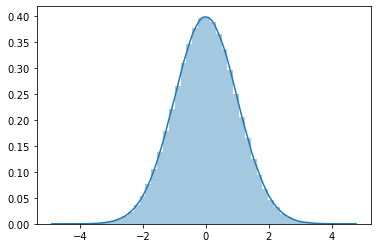

In [5]:
x = torch.tensor(np.random.randn(int(1e6), ))
sns.distplot(x)
x.mean(), x.std()

### Initializing Tensors with "Like" Type Methods
PyTorch allows you to create tensors "like" other tensors in that they are the same shape. However, these tensors can be filled in different ways. One example is `torch.randn_like()`, which takes any tensor and creates a new one of the same shape. The new tensor is filled by a normal distribution of data.

0, 0


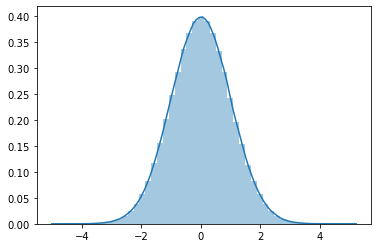

In [6]:
x = torch.zeros(int(1e6))
y = torch.randn_like(x)
sns.distplot(y)
print(f'{int(y.mean())}, {int(y.std())}')

There are many other ways to initialize a new tensor "like" an old one. 

In [7]:
z = torch.zeros_like(y)
a = torch.randint_like(z, low=0, high=9)
a, z

(tensor([7., 1., 8.,  ..., 0., 2., 4.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]))

### Dimensions of Tensors
Getting the dimensions of a tensor can be done in two ways: `Tensor.size` and `Tensor.shape`. The `.shape` method was added to remain consistent with NumPy's `ndarra.shape` attribute. 

In [8]:
z.shape, z.size()

(torch.Size([1000000]), torch.Size([1000000]))

### Basic Operations
All operations between tensors work as expected, if you have done any mathematical computing with NumPy. 

In [9]:
x + y

tensor([ 0.2344, -1.1836,  1.3422,  ...,  1.7023,  0.2434, -0.1390])

In [10]:
result = torch.empty(int(1e6))
torch.add(x, y, out=result)
result

tensor([ 0.2344, -1.1836,  1.3422,  ...,  1.7023,  0.2434, -0.1390])

### In-place Operations
PyTorch has a host of in-place functionality. All methods that alter a tensor in-place are denoted with a trailing underscore:

In [11]:
y.add_(x)
y

tensor([ 0.2344, -1.1836,  1.3422,  ...,  1.7023,  0.2434, -0.1390])

### Slicing
Slicing works in an identical fashion to NumPy. In the following example, we create tensor with demensions (2, 2, 3).

In [12]:
x = torch.randn(2,2,3)
x

tensor([[[ 0.7110, -0.9946, -0.2346],
         [-0.6387, -0.0176,  0.0155]],

        [[ 1.2668,  0.6533,  1.1599],
         [-0.3692, -0.0092,  1.4174]]])

The output shows a tensor containing 2 2x2 sub-tensors. Using traditional NumPy slicing, we can obtain the first row of each of the two sub-tensors: 

In [13]:
x[:,0, :]

tensor([[ 0.7110, -0.9946, -0.2346],
        [ 1.2668,  0.6533,  1.1599]])

In [14]:

x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1, 8)
x.shape, y.shape, z.shape

(torch.Size([4, 4]), torch.Size([16]), torch.Size([2, 8]))

### Moving Your Data to a GPU
PyTorch was designed to allow for fast linear algebra operations on a GPU. This enables great speed increases when training neural networs, which heavily rely on large matrix calculations. 

We can move our tensors to GPU like so:

In [15]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))

In [16]:
torch.cuda.is_available()

False